In [15]:
import os
import subprocess
import numpy as np
import pandas as pd
from tqdm import tqdm

In [28]:
python_script = "/Users/mihajlobulesnij/Documents/system/RAI/project/DRL_DGM/input_output_generator_dataset.py"
seeds = [1, 2,3 ]
c_range = [1]
b_range = [1]
r_range = [1, 2, 3, 4, 5, 6]
m_range = [0.1]

save_path = "gen_dataset_new/old_constr_unsup"
commands = []

for c_v in c_range:
    for r_v in r_range:
        for m_v in m_range:
            for b_v in b_range:
                for seed in seeds:
                    cmd = f'/opt/homebrew/Caskroom/miniconda/base/envs/drl_env/bin/python {python_script} --n_samples {1000} --n_outputs {8} --seed {seed} --c "{c_v}"  --r "{r_v}" --m "{m_v}"  --b "{b_v}" --save_path {save_path}'
                    commands.append(cmd)

In [29]:
commands

['/opt/homebrew/Caskroom/miniconda/base/envs/drl_env/bin/python /Users/mihajlobulesnij/Documents/system/RAI/project/DRL_DGM/input_output_generator_dataset.py --n_samples 1000 --n_outputs 8 --seed 1 --c "1"  --r "1" --m "0.1"  --b "1" --save_path gen_dataset_new/old_constr_unsup',
 '/opt/homebrew/Caskroom/miniconda/base/envs/drl_env/bin/python /Users/mihajlobulesnij/Documents/system/RAI/project/DRL_DGM/input_output_generator_dataset.py --n_samples 1000 --n_outputs 8 --seed 2 --c "1"  --r "1" --m "0.1"  --b "1" --save_path gen_dataset_new/old_constr_unsup',
 '/opt/homebrew/Caskroom/miniconda/base/envs/drl_env/bin/python /Users/mihajlobulesnij/Documents/system/RAI/project/DRL_DGM/input_output_generator_dataset.py --n_samples 1000 --n_outputs 8 --seed 3 --c "1"  --r "1" --m "0.1"  --b "1" --save_path gen_dataset_new/old_constr_unsup',
 '/opt/homebrew/Caskroom/miniconda/base/envs/drl_env/bin/python /Users/mihajlobulesnij/Documents/system/RAI/project/DRL_DGM/input_output_generator_dataset.py

In [17]:
for i, cmd in tqdm(enumerate(commands, 1)):
    print(f"\n▶️ Running command {i}/{len(commands)}:\n{cmd}\n")
    
    result = subprocess.run(cmd, shell=True)

    if result.returncode != 0:
        print(f"❌ Command failed with exit code {result.returncode}:")
        print(cmd)
        break
    else:
        print(f"✅ Completed {i}/{len(commands)}\n")

0it [00:00, ?it/s]


▶️ Running command 1/6:
/opt/homebrew/Caskroom/miniconda/base/envs/drl_env/bin/python /Users/mihajlobulesnij/Documents/system/RAI/project/DRL_DGM/input_output_generator_dataset.py --n_samples 1000 --n_outputs 8 --seed 1 --c "1"  --r "2.5" --m "0.1"  --b "1" --save_path gen_dataset_new/region_constr_with_inputvar

False
All random seeds set to 1
UNSAT on attempt 1, retrying...
UNSAT on attempt 2, retrying...
UNSAT on attempt 3, retrying...
UNSAT on attempt 4, retrying...
UNSAT on attempt 5, retrying...
UNSAT on attempt 6, retrying...
UNSAT on attempt 7, retrying...
UNSAT on attempt 8, retrying...
UNSAT on attempt 9, retrying...
UNSAT on attempt 10, retrying...
UNSAT on attempt 11, retrying...
UNSAT on attempt 12, retrying...
UNSAT on attempt 13, retrying...
UNSAT on attempt 14, retrying...
UNSAT on attempt 15, retrying...
UNSAT on attempt 16, retrying...
UNSAT on attempt 17, retrying...
UNSAT on attempt 18, retrying...
UNSAT on attempt 19, retrying...
UNSAT on attempt 20, retrying...
U

0it [00:15, ?it/s]


KeyboardInterrupt: 

In [54]:
import ast
df = pd.read_csv("dataset_new/real/dataset_info.csv")

df["L1_distance"] = df["L1_distance"].apply(ast.literal_eval)
df["L1_distance_mean"] = df["L1_distance"].apply(np.mean)
df["L1_distance_std"] = df["L1_distance"].apply(np.mean)

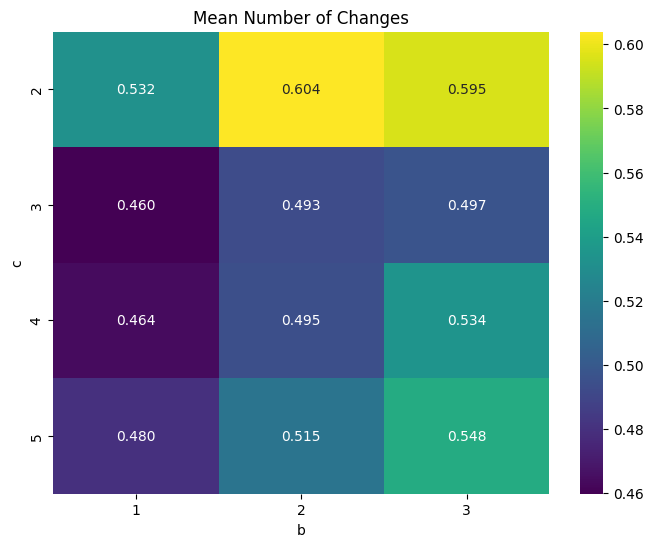

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_stats = df.groupby(["c", "b"])["L1_distance_mean"].agg(["mean", "std"]).reset_index()

heatmap_data = df_stats.pivot(index="c", columns="b", values="mean")

plt.figure(figsize=(8,6))
sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap="viridis")
plt.xlabel("b")
plt.ylabel("c")
plt.title("Mean Number of Changes")
plt.show()


TypeError: the resolved dtypes are not compatible with add.reduce. Resolved (dtype('<U24'), dtype('<U24'), dtype('<U48'))

In [118]:
import matplotlib.pyplot as plt
df = pd.read_csv("model_results/result_very_precise_masked.csv")
df[["c", "r", "b", "data_seed"]] = df["experiment_path"].str.split("_", expand=True)
df["c"] = pd.to_numeric(df["c"], errors="coerce")

In [8]:
import pandas as pd

df = pd.read_csv("gen_dataset_new/unsup/5_1.0_1_0.1_1/train.csv")
df["pred_4"].unique()

array([ 1.        ,  0.9999999 ,  2.40909033,  0.9999995 ,  0.9994386 ,
        0.99990773,  1.35861223,  2.26020889,  0.99999917,  0.9999919 ,
        0.999985  ,  0.99999976,  0.9999666 ,  1.61418324,  0.99999964,
        2.06473427,  0.99999845,  2.20557051,  1.64821391,  1.94771771,
        1.72075455,  1.24235456,  0.9999993 ,  0.9999987 ,  0.99999833,
        0.99192506,  1.85426717,  0.99999225,  0.9999944 ,  1.17563848,
        0.9929838 ,  1.72155325,  0.9957587 ,  2.07416134,  0.9999862 ,
        0.999982  ,  0.9999989 ,  0.9999603 ,  1.16832082,  4.57524948,
        2.66609125,  0.99999213,  0.9999949 ,  0.99998844,  0.9999994 ,
        1.17298071,  1.49771159,  1.085344  ,  1.57279675,  1.08373349,
        0.9999814 ,  0.9999962 ,  1.14788775,  1.71482329,  1.27558713,
        1.51619499,  2.8032959 ,  0.9999689 ,  0.999998  ,  0.9999981 ,
        0.99999905,  1.55997221,  1.08799105,  0.9999852 ,  0.9979547 ,
        0.9999671 ,  0.9999931 ,  1.81796436,  2.00506334,  1.41

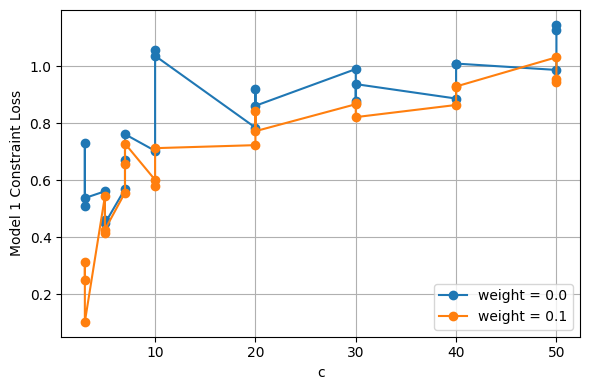

In [150]:
import matplotlib.pyplot as plt
df = pd.read_csv("model_results/result_very_precise_masked.csv")
df[["c", "r", "b", "data_seed"]] = df["experiment_path"].str.split("_", expand=True)
df["c"] = pd.to_numeric(df["c"], errors="coerce")

mean_va = (
    df.groupby(["c","r", "constraints_weight"])[["model1_mae", "model2_mae", "model_1_violation_loss",	"model_2_violation_loss"]]
      .mean()
      .reset_index()
      .sort_values("c")
)
mean_va[(mean_va["constraints_weight"] == 0.0)] - mean_va[(mean_va["constraints_weight"] == 0.1)]

# Ensure correct types and ordering
mean_va["c"] = mean_va["c"].astype(int)

df0 = mean_va[(mean_va["constraints_weight"] == 0.0)].sort_values("c")
df02 = mean_va[(mean_va["constraints_weight"] == 0.1)].sort_values("c")

plt.figure(figsize=(6,4))
plt.plot(df0["c"], df0["model_1_violation_loss"], marker="o", label="weight = 0.0")
plt.plot(df02["c"], df02["model_1_violation_loss"], marker="o", label="weight = 0.1")

plt.xlabel("c")
plt.ylabel("Model 1 Constraint Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [123]:
df1 = pd.read_csv("model_results_new/resuls_unsup_input.csv")
split_cols = df1["experiment_path"].str.split("_", expand=True)
df1["c"] = pd.to_numeric(split_cols[0], errors="coerce")
df1["r"] = pd.to_numeric(split_cols[1], errors="coerce")
df1["m"] = pd.to_numeric(split_cols[3], errors="coerce")


df2 = pd.read_csv("model_results_new/resuls_unsup.csv")
split_cols = df2["experiment_path"].str.split("_", expand=True)
df2["c"] = pd.to_numeric(split_cols[0], errors="coerce")
df2["r"] = pd.to_numeric(split_cols[1], errors="coerce")
df2["m"] = pd.to_numeric(split_cols[3], errors="coerce")

In [128]:
df1.

,results_per_region_model1,model1_mae,test,model_1_violation_loss,experiment_path,seed,constraints_weight,model1batch_size,model1epochs,model1lr,...,model1constraints_weight,model2batch_size,model2epochs,model2lr,model2hidden_dim,model2device,model2patience,c,r,m
0,"[(0.10230478644371033, 0), (0.0888899266719818...",0.066043,0.0,0.252344,5_2.0_1_0.1_3,1,0.0,32,100,0.001,...,0.0,32,0,0.001,100,cpu,20,5,2.0,0.1
1,"[(0.031745508313179016, 0), (0.051182828843593...",0.028012,0.0,0.156978,5_1.0_1_0.1_2,1,0.0,32,100,0.001,...,0.0,32,0,0.001,100,cpu,20,5,1.0,0.1
2,"[(0.05047863349318504, 0), (0.0505141951143741...",0.033515,0.0,0.126087,5_1.0_1_0.1_1,1,0.0,32,100,0.001,...,0.0,32,0,0.001,100,cpu,20,5,1.0,0.1
3,"[(0.24183546006679535, 0), (0.2144825905561447...",0.143697,0.0,0.740554,5_5.0_1_0.1_1,1,0.0,32,100,0.001,...,0.0,32,0,0.001,100,cpu,20,5,5.0,0.1
4,"[(0.09618399292230606, 0), (0.0545749850571155...",0.055719,0.0,0.327805,5_2.0_1_0.1_2,1,0.0,32,100,0.001,...,0.0,32,0,0.001,100,cpu,20,5,2.0,0.1
5,"[(0.05514688789844513, 0), (0.0269376449286937...",0.027284,0.0,0.113215,5_1.0_1_0.1_3,1,0.0,32,100,0.001,...,0.0,32,0,0.001,100,cpu,20,5,1.0,0.1
6,"[(0.3089263439178467, 0), (0.20379233360290527...",0.161413,0.0,0.752273,5_5.0_1_0.1_3,1,0.0,32,100,0.001,...,0.0,32,0,0.001,100,cpu,20,5,5.0,0.1
7,"[(0.12476456165313721, 0), (0.0954926535487175...",0.091405,0.0,0.521479,5_5.0_1_0.1_2,1,0.0,32,100,0.001,...,0.0,32,0,0.001,100,cpu,20,5,5.0,0.1
8,"[(0.14277678728103638, 0), (0.1453854739665985...",0.096568,0.0,0.398752,5_3.0_1_0.1_1,1,0.0,32,100,0.001,...,0.0,32,0,0.001,100,cpu,20,5,3.0,0.1
9,"[(0.15994326770305634, 0), (0.1114497333765029...",0.077791,0.0,0.320108,5_2.0_1_0.1_1,1,0.0,32,100,0.001,...,0.0,32,0,0.001,100,cpu,20,5,2.0,0.1


In [129]:
print(df1.groupby("r").model_1_violation_loss.mean())
print(df2.groupby("r").model_1_violation_loss.mean())

r
1.0    0.174104
2.0    0.294812
3.0    0.394175
4.0    0.499925
5.0    0.663139
Name: model_1_violation_loss, dtype: float64
r
1.0    0.068575
2.0    0.142774
3.0    0.250244
4.0    0.386500
5.0    0.494204
Name: model_1_violation_loss, dtype: float64


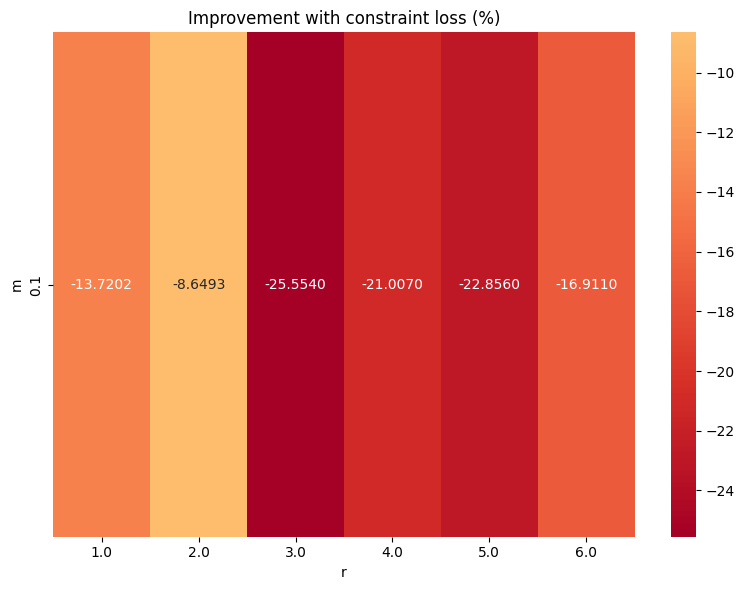

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load and parse the data
df = pd.read_csv("model_results_new/old_constrs_unsup.csv")

split_cols = df["experiment_path"].str.split("_", expand=True)
df["c"] = pd.to_numeric(split_cols[0], errors="coerce")
df["r"] = pd.to_numeric(split_cols[1], errors="coerce")
df["m"] = pd.to_numeric(split_cols[3], errors="coerce")
df["seed_data"] = pd.to_numeric(split_cols[4], errors="coerce")

metrics = ["model1_mae"]

df_0 = df[df["constraints_weight"] == 0.0]
df_1 = df[df["constraints_weight"] == 0.5]

merge_cols = ["r", "m", "seed_data"]  # add any other identifiers if needed

merged = df_0.merge(
    df_1,
    on=merge_cols,
    suffixes=("_0", "_1")
)

# 4. Compute relative improvement PER SEED
for metric in metrics:
    merged[f"{metric}_improvement"] = (
        100 - (100 * merged[f"{metric}_1"] / merged[f"{metric}_0"])
    )

# 5. Average improvements over seeds
mean_improvement = (
    merged
    .groupby(["r", "m"])[[f"{m}_improvement" for m in metrics]]
    .mean()
    .reset_index()
)

# 6. Plot heatmaps
fig, axes = plt.subplots(1, len(metrics), figsize=(8 * len(metrics), 6))
if len(metrics) == 1:
    axes = [axes]

for i, metric in enumerate(metrics):
    pivot_table = mean_improvement.pivot(
        index="m", columns="r", values=f"{metric}_improvement"
    )
    sns.heatmap(
        pivot_table,
        annot=True,
        fmt=".4f",
        cmap="RdYlGn",
        center=0,
        ax=axes[i]
    )
    axes[i].set_title("Improvement with constraint loss (%)")
    axes[i].set_xlabel("r")
    axes[i].set_ylabel("m")

plt.tight_layout()
plt.savefig("metric_differences_heatmap.png")


In [24]:
df

,results_per_region_model1,model1_mae,test,model_1_violation_loss,experiment_path,seed,constraints_weight,model1batch_size,model1epochs,model1lr,...,model2batch_size,model2epochs,model2lr,model2hidden_dim,model2device,model2patience,c,r,m,seed_data
0,"[(0.1841515749692917, 0), (0.11831443011760712...",0.101813,0.0,0.085774,5_1.0_1_0.1_2,1,0.1,32,100,0.001,...,32,0,0.001,100,cpu,20,5,1.0,0.1,2
1,"[(0.13635313510894775, 0), (0.0917777940630912...",0.073026,0.0,0.158028,5_5.0_1_0.1_3,1,0.1,32,100,0.001,...,32,0,0.001,100,cpu,20,5,5.0,0.1,3
2,"[(0.13061422109603882, 0), (0.1032788008451461...",0.091966,0.0,0.252533,5_5.0_1_0.1_1,1,0.1,32,100,0.001,...,32,0,0.001,100,cpu,20,5,5.0,0.1,1
3,"[(0.22794529795646667, 0), (0.1196102723479271...",0.122445,0.0,0.239581,5_4.0_1_0.1_2,1,0.1,32,100,0.001,...,32,0,0.001,100,cpu,20,5,4.0,0.1,2
4,"[(0.24519585072994232, 0), (0.1590259522199630...",0.144428,0.0,0.222937,5_5.0_1_0.1_2,1,0.1,32,100,0.001,...,32,0,0.001,100,cpu,20,5,5.0,0.1,2
5,"[(0.1721787303686142, 0), (0.1369258612394333,...",0.108222,0.0,0.212391,5_4.0_1_0.1_1,1,0.1,32,100,0.001,...,32,0,0.001,100,cpu,20,5,4.0,0.1,1
6,"[(0.13979029655456543, 0), (0.0877859294414520...",0.072405,0.0,0.098687,5_3.0_1_0.1_3,1,0.1,32,100,0.001,...,32,0,0.001,100,cpu,20,5,3.0,0.1,3
7,"[(0.24144968390464783, 0), (0.1264389008283615...",0.101322,0.0,0.016110,5_1.0_1_0.1_1,1,0.1,32,100,0.001,...,32,0,0.001,100,cpu,20,5,1.0,0.1,1
8,"[(0.1376505196094513, 0), (0.11057780683040619...",0.076045,0.0,0.109712,5_4.0_1_0.1_3,1,0.1,32,100,0.001,...,32,0,0.001,100,cpu,20,5,4.0,0.1,3
9,"[(0.21024665236473083, 0), (0.1644042730331421...",0.112116,0.0,0.127869,5_3.0_1_0.1_1,1,0.1,32,100,0.001,...,32,0,0.001,100,cpu,20,5,3.0,0.1,1


In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast
# 1. Load and parse the data
df = pd.read_csv("model_results_new/resuls_unsup_input.csv")

split_cols = df["experiment_path"].str.split("_", expand=True)
df["c"] = pd.to_numeric(split_cols[0], errors="coerce")
df["r"] = pd.to_numeric(split_cols[1], errors="coerce")
df["m"] = pd.to_numeric(split_cols[3], errors="coerce")
df["seed_data"] = pd.to_numeric(split_cols[4], errors="coerce")

parsed = df["results_per_region_model1"].apply(ast.literal_eval)

# convert list of tuples -> dict {region: value}
region_df = parsed.apply(lambda x: {f"region_{r}": v for v, r in x})

# expand into columns
df = pd.concat([df, region_df.apply(pd.Series)], axis=1)

metrics = ["region_0","region_1","region_2","region_3","region_4"]

df_0 = df[df["constraints_weight"] == 0.0]
df_1 = df[df["constraints_weight"] == 0.1]

merge_cols = ["r", "m", "seed_data"]  # add any other identifiers if needed

merged = df_0.merge(
    df_1,
    on=merge_cols,
    suffixes=("_0", "_1")
)

# 4. Compute relative improvement PER SEED
for metric in metrics:
    merged[f"{metric}_improvement"] = (
        100 - (100 * merged[f"{metric}_1"] / merged[f"{metric}_0"])
    )

# 5. Average improvements over seeds
mean_improvement = (
    merged
    .groupby(["r", "m"])[[f"{m}_improvement" for m in metrics]]
    .mean()
    .reset_index()
)

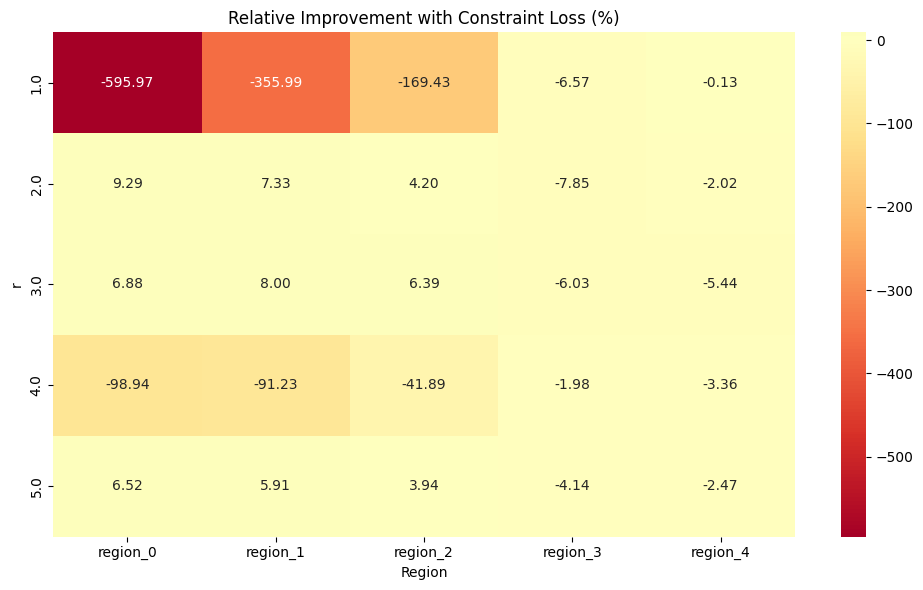

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only region_1 to region_4
region_cols = [
    "region_0_improvement",
    "region_1_improvement",
    "region_2_improvement",
    "region_3_improvement",
    "region_4_improvement",
]

# Prepare heatmap data
heatmap_df = (
    mean_improvement
    .set_index("r")[region_cols]
    .sort_index()
)

# Clean column names
heatmap_df.columns = [c.replace("_improvement", "") for c in heatmap_df.columns]

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_df,
    annot=True,
    fmt=".2f",
    cmap="RdYlGn",
    center=0
)

plt.title("Relative Improvement with Constraint Loss (%)")
plt.xlabel("Region")
plt.ylabel("r")

plt.tight_layout()
plt.show()


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ["region_0", "region_1", "region_2", "region_3", "region_4"]

# set r as index for heatmap
heatmap_df = mean_improvement.set_index("r")[cols]

plt.figure(figsize=(8, 5))
sns.heatmap(
    heatmap_df,
    annot=True,
    fmt=".1f",
    cmap="RdYlGn",
    center=0,
    linewidths=0.5
)

plt.xlabel("Region")
plt.ylabel("r")
plt.title("Percentage Difference MAE")
plt.show()


KeyError: "None of [Index(['region_0', 'region_1', 'region_2', 'region_3', 'region_4'], dtype='object')] are in the [columns]"

In [58]:
diff_df = ((100 * df_1.loc[idx]) / df_0.loc[idx])
diff_df = diff_df.reset_index()

In [59]:
diff_df

,m,r,model1_mae,model_1_violation_loss
0,0.7,4.0,77.611598,61.385612
1,0.3,5.0,68.276775,57.579345
2,0.7,5.0,66.954583,63.973258
3,0.9,5.0,68.788635,70.865995
4,0.5,7.0,63.206175,63.680294
5,0.3,8.0,56.015047,61.764457
6,0.7,8.0,59.045614,70.324301
7,0.9,8.0,57.579987,71.315278


In [57]:
0.43266 * 100 / 0.335801

128.84684679319

In [56]:
df_1.loc[idx]

,,model1_mae,model_1_violation_loss
m,r,,
0.7,4.0,0.335801,1.114882
0.3,5.0,0.239104,0.744543
0.7,5.0,0.325987,1.421788
0.9,5.0,0.390173,1.976518
0.5,7.0,0.269696,1.161315
0.3,8.0,0.222243,0.959061
0.7,8.0,0.320503,1.866207
0.9,8.0,0.368160,2.367768


In [54]:
diff_df.reset_index()

,m,r,model1_mae,model_1_violation_loss
0,0.7,4.0,77.611598,61.385612
1,0.3,5.0,68.276775,57.579345
2,0.7,5.0,66.954583,63.973258
3,0.9,5.0,68.788635,70.865995
4,0.5,7.0,63.206175,63.680294
5,0.3,8.0,56.015047,61.764457
6,0.7,8.0,59.045614,70.324301
7,0.9,8.0,57.579987,71.315278


In [51]:
df_1.loc[idx]

,,model1_mae,model_1_violation_loss
m,r,,
0.7,4.0,0.335801,1.114882
0.3,5.0,0.239104,0.744543
0.7,5.0,0.325987,1.421788
0.9,5.0,0.390173,1.976518
0.5,7.0,0.269696,1.161315
0.3,8.0,0.222243,0.959061
0.7,8.0,0.320503,1.866207
0.9,8.0,0.368160,2.367768


In [49]:
df_0.loc[idx]

,,model1_mae,model_1_violation_loss
m,r,,
0.7,4.0,0.432669,1.816194
0.3,5.0,0.350197,1.293073
0.7,5.0,0.486878,2.222473
0.9,5.0,0.567205,2.789092
0.5,7.0,0.426692,1.823665
0.3,8.0,0.396756,1.552772
0.7,8.0,0.542805,2.653715
0.9,8.0,0.639388,3.320142


In [ ]:

for i, cmd in tqdm(enumerate(commands, 1)):
    print(f"\n▶️ Running command {i}/{len(commands)}:\n{cmd}\n")
    
    result = subprocess.run(cmd, shell=True)

    if result.returncode != 0:
        print(f"❌ Command failed with exit code {result.returncode}:")
        print(cmd)
        break
    else:
        print(f"✅ Completed {i}/{len(commands)}\n")

In [1]:
import pandas as pd
df_data = pd.read_csv("constr_input_output_2/dataset_info.csv")

In [2]:
df_grouped_m1_v = df_data.groupby(["c", "b"]).total_combined.mean().reset_index()


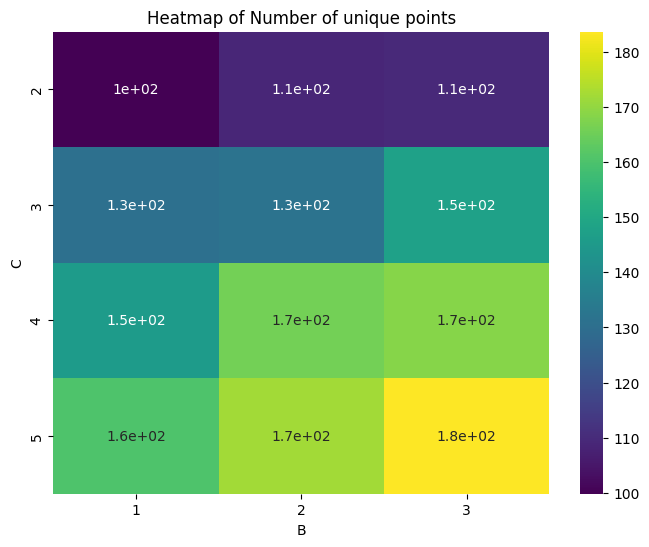

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example DataFrame
# df = pd.DataFrame({'x': [...], 'y': [...], 'value': [...]})

# Pivot the DataFrame to get x vs y matrix
heatmap_data = df_grouped_m1_v.pivot(index='c', columns='b', values='total_combined')

# Plot
plt.figure(figsize=(8,6))
sns.heatmap(heatmap_data, cmap='viridis', annot=True)  # annot=True shows values
plt.title("Heatmap of Number of unique points")
plt.xlabel("B")
plt.ylabel("C")
plt.show()


In [12]:
import pandas as pd
df = pd.read_csv("/Users/mihajlobulesnij/Documents/system/RAI/project/DRL_DGM/model_results/input_output2.csv")

In [13]:
df[["c", "r", "b", "data_seed"]] = df["experiment_path"].str.split("_", expand=True)

In [11]:
df = df.groupby("r").model_1_violation.mean()

In [6]:
df_grouped_m1_v = df.groupby(["c", "b"]).model_1_violation.mean().reset_index()
df_grouped_m2_v = df.groupby(["c", "b"]).model_2_violation.mean().reset_index()

df_grouped_m1_h = df.groupby(["c","b"]).model1_hamming.mean().reset_index()
df_grouped_m2_h = df.groupby(["c", "b"]).model2_hamming.mean().reset_index()


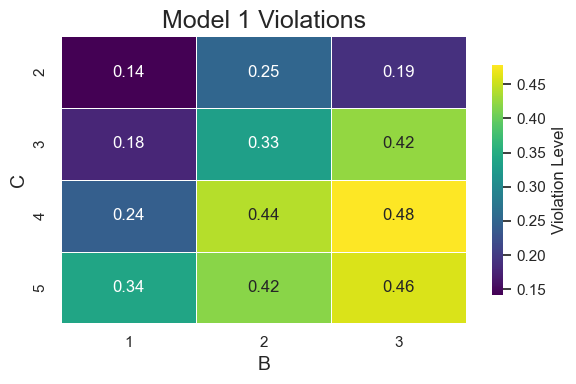

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set a clean style (font_scale affects annotations and other elements too)
sns.set_theme(style="white")

# Pivot table for Model 1
heatmap_m1 = df_grouped_m1_v.pivot(index='c', columns='b', values='model_1_violation')

# Smaller plot
plt.figure(figsize=(6, 4))  # smaller figure

sns.heatmap(
    heatmap_m1,
    cmap="viridis",
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8, "label": "Violation Level"}
)

# Larger axis labels
plt.title("Model 1 Violations", fontsize=18)
plt.xlabel("B", fontsize=14)
plt.ylabel("C", fontsize=14)

plt.tight_layout()
plt.show()


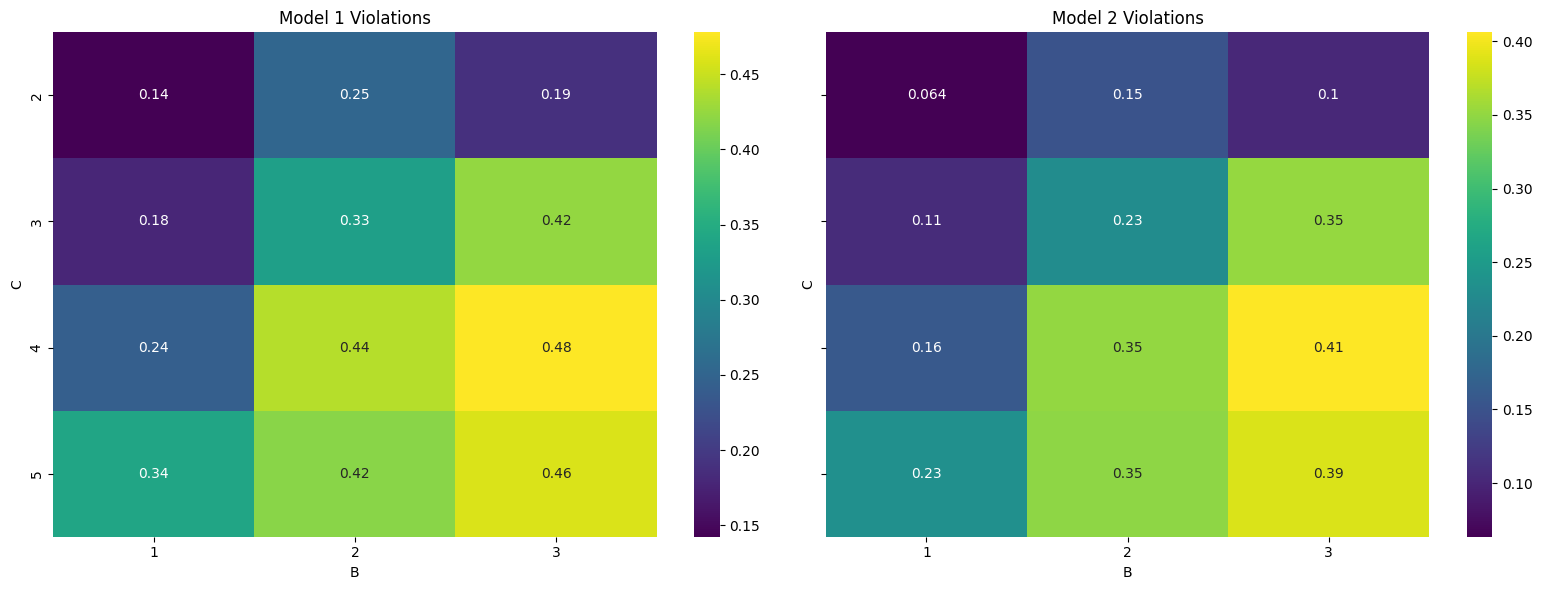

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot for Model 1
heatmap_m1 = df_grouped_m1_v.pivot(index='c', columns='b', values='model_1_violation')

# Pivot for Model 2
heatmap_m2 = df_grouped_m2_v.pivot(index='c', columns='b', values='model_2_violation')

# Plot both side-by-side
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharex=True, sharey=True)

sns.heatmap(heatmap_m1, cmap='viridis', annot=True, ax=axes[0])
axes[0].set_title("Model 1 Violations")
axes[0].set_xlabel("B")
axes[0].set_ylabel("C")

sns.heatmap(heatmap_m2, cmap='viridis', annot=True, ax=axes[1])
axes[1].set_title("Model 2 Violations")
axes[1].set_xlabel("B")
axes[1].set_ylabel("C")

plt.tight_layout()
plt.show()


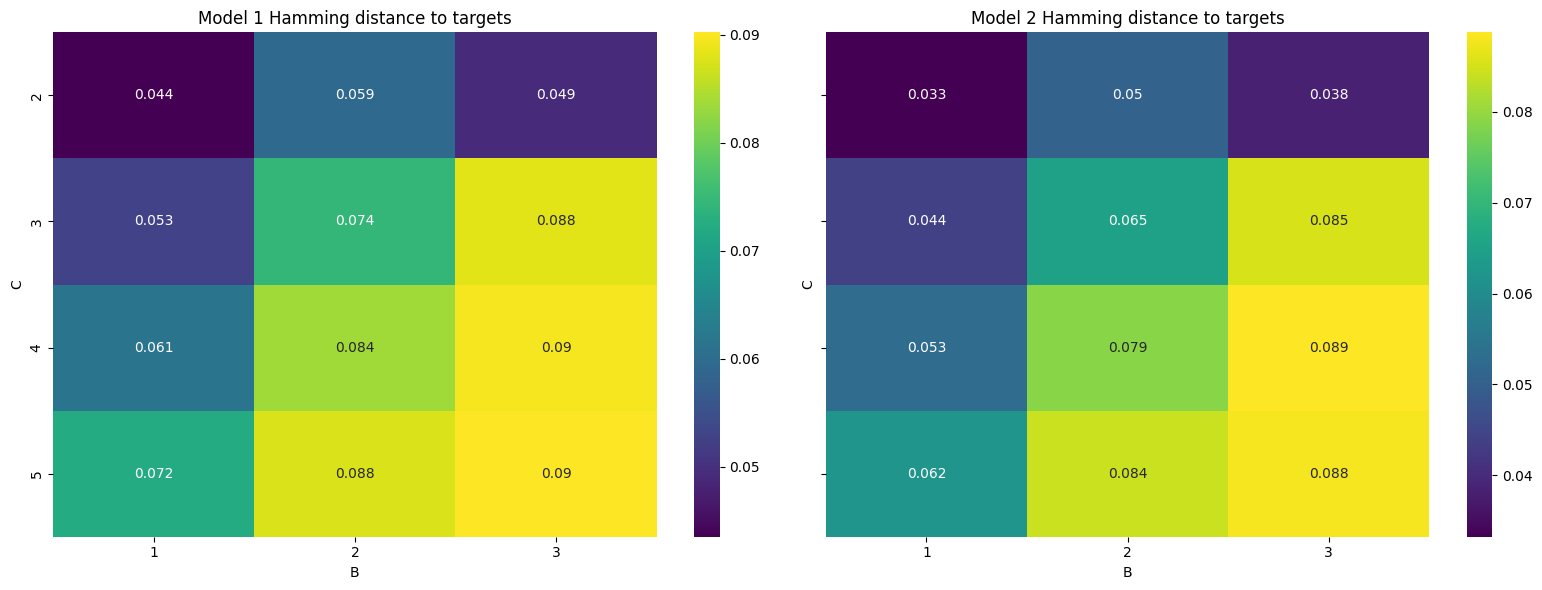

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot for Model 1
heatmap_m1 = df_grouped_m1_h.pivot(index='c', columns='b', values='model1_hamming')

# Pivot for Model 2
heatmap_m2 = df_grouped_m2_h.pivot(index='c', columns='b', values='model2_hamming')

# Plot both side-by-side
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharex=True, sharey=True)

sns.heatmap(heatmap_m1, cmap='viridis', annot=True, ax=axes[0])
axes[0].set_title("Model 1 Hamming distance to targets")
axes[0].set_xlabel("B")
axes[0].set_ylabel("C")

sns.heatmap(heatmap_m2, cmap='viridis', annot=True, ax=axes[1])
axes[1].set_title("Model 2 Hamming distance to targets")
axes[1].set_xlabel("B")
axes[1].set_ylabel("C")

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example DataFrame
# df = pd.DataFrame({'x': [...], 'y': [...], 'value': [...]})

# Pivot the DataFrame to get x vs y matrix
heatmap_data = df_grouped_m1_v.pivot(index='c', columns='b', values='model_1_violation')

# Plot
plt.figure(figsize=(8,6))
sns.heatmap(heatmap_data, cmap='viridis', annot=True)  # annot=True shows values
plt.title("Heatmap of Number of unique points")
plt.xlabel("B")
plt.ylabel("C")
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example DataFrame
# df = pd.DataFrame({'x': [...], 'y': [...], 'value': [...]})

# Pivot the DataFrame to get x vs y matrix
heatmap_data = df_grouped_m2_v.pivot(index='c', columns='b', values='model_2_violation')

# Plot
plt.figure(figsize=(8,6))
sns.heatmap(heatmap_data, cmap='viridis', annot=True)  # annot=True shows values
plt.title("Heatmap of Number of unique points")
plt.xlabel("B")
plt.ylabel("C")
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example DataFrame
# df = pd.DataFrame({'x': [...], 'y': [...], 'value': [...]})

# Pivot the DataFrame to get x vs y matrix
heatmap_data = df_grouped_m2_h.pivot(index='c', columns='b', values='model2_hamming')

# Plot
plt.figure(figsize=(8,6))
sns.heatmap(heatmap_data, cmap='viridis', annot=True)  # annot=True shows values
plt.title("Heatmap of Number of unique points")
plt.xlabel("B")
plt.ylabel("C")
plt.show()


In [15]:
import pandas as pd
import ast

In [35]:
df = pd.read_csv("/Users/mihajlobulesnij/Documents/system/RAI/project/DRL_DGM/dataset_new/real/dataset_info.csv")
df['L1_distance'] = df['L1_distance'].apply(ast.literal_eval)
df['L1_distance'] = df['L1_distance'].apply(sum)



In [36]:
df = df.groupby(["c", "b", "r"]).L1_distance.mean().reset_index()

In [40]:
import plotly.express as px

fig = px.scatter_3d(
    df,
    x='c',
    y='b',
    z='r',
    color='L1_distance'
)

fig.show()
